# DBSCAN Clustering Exercise: Mall Customer Segmentation

In this exercise, you will use DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to identify customer segments based on their shopping behavior. This analysis will help understand different customer groups and their characteristics.

## Dataset Description
The Mall Customer Segmentation dataset contains information about customers including:
- CustomerID: Unique identifier for each customer
- Gender: Customer's gender
- Age: Customer's age
- Annual Income (k$): Customer's annual income in thousands of dollars
- Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature

## Why DBSCAN?
DBSCAN is particularly useful for this dataset because:
1. It can identify clusters of varying shapes and sizes
2. It can detect outliers (unusual customer behavior)
3. It doesn't assume clusters are spherical
4. It doesn't require specifying the number of clusters beforehand

## Your Task
1. Load and explore the dataset
2. Preprocess the data
3. Implement DBSCAN clustering
4. Evaluate the clustering results
5. Visualize the customer segments
6. Analyze segment characteristics

Follow the steps below and fill in the code where indicated.

In [201]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# Create the customer dataset
data = {
    'CustomerID': range(1, 201),
    'Gender': np.random.choice(['Male', 'Female'], size=200),
    'Age': np.random.randint(18, 70, size=200),
    'Annual_Income': np.random.normal(60, 15, size=200),
    'Spending_Score': np.random.normal(50, 25, size=200)
}
df = pd.DataFrame(data)

# Ensure realistic values
df['Annual_Income'] = df['Annual_Income'].clip(20, 100)
df['Spending_Score'] = df['Spending_Score'].clip(1, 100)

# Display the first few rows and basic information about the dataset
# Your code here

## Data Preprocessing
1. Check for missing values
2. Convert categorical variables
3. Scale the features
4. Select relevant features for clustering

Your task:
- Examine the data for any missing values
- Handle the categorical 'Gender' variable
- Scale numerical features using StandardScaler
- Select appropriate features for clustering

In [202]:
# Your code here
# 1. Check for missing values
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
df = df.dropna()

# 2. Convert categorical variables
# Convert Gender to separate columns (0/1 instead of True/False)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype=int)
print("\nData after encoding:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   Gender          200 non-null    object 
 2   Age             200 non-null    int32  
 3   Annual_Income   200 non-null    float64
 4   Spending_Score  200 non-null    float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing values:
CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

Data after encoding:
   CustomerID  Age  Annual_Income  Spending_Score  Gender_Male
0           1   27      41.597263       27.319004            1
1           2   39      57.133282       30.404671            1
2           3   36      63.255254       54.719999            1
3           4   68      88.243610       46.967118            1
4           5   49     

## DBSCAN Implementation
1. Determine appropriate epsilon (eps) and min_samples parameters
2. Use NearestNeighbors to find optimal eps value
3. Train the DBSCAN model
4. Analyze the clustering results

Your task:
- Implement the k-distance graph to find optimal eps
- Create and train the DBSCAN model
- Analyze the number of clusters and noise points

In [203]:
# 3. Scale the features 'Annual_Income' and 'Spending_Score'
scaler = StandardScaler()
features_to_scale = ['Annual_Income', 'Spending_Score']
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_to_scale]), 
                        columns=features_to_scale)
print("\nScaled features:")
print(df_scaled.head())

# 4. Select features for clustering
X_cluster = df_scaled.copy()  # Already has only the 2 features we need

print("\nFinal clustering features:")
print(f"Features: {list(X_cluster.columns)}")
print(f"Shape: {X_cluster.shape}")



Scaled features:
   Annual_Income  Spending_Score
0      -1.168913       -1.029470
1      -0.119384       -0.904662
2       0.294183        0.078840
3       1.982259       -0.234747
4      -2.627906        0.183114

Final clustering features:
Features: ['Annual_Income', 'Spending_Score']
Shape: (200, 2)


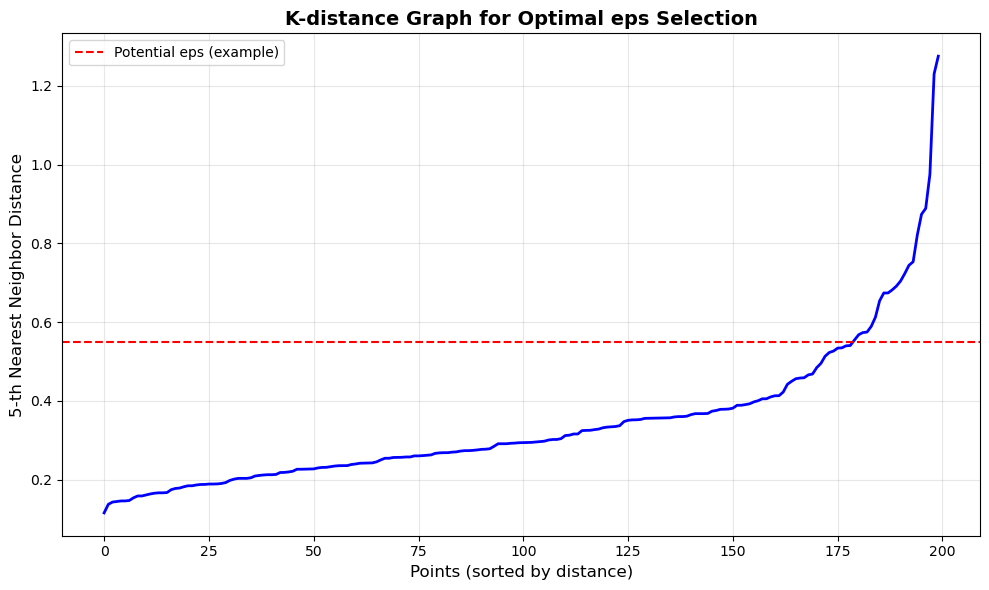

📊 Look for the 'elbow' point in the graph above
The optimal eps is where the curve bends sharply (steep increase)

✅ DBSCAN Results:
   eps: 0.55
   min_samples: 5
   Number of clusters: 1
   Number of noise points: 8 (4.0%)
   Cluster distribution:
      Noise: 8 points
      Cluster 0: 192 points


In [204]:

# Your code here
# 1. Find optimal eps using k-distance graph
from sklearn.neighbors import NearestNeighbors

# Choose k = min_samples (typically 5 for 4-dimensional data)
k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_cluster)

# Get distances to k-th nearest neighbor for each point
distances, indices = neigh.kneighbors(X_cluster)

# Sort distances in ascending order (smallest to largest)
distances_sorted = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(distances_sorted)), distances_sorted, 'b-', linewidth=2)
plt.xlabel('Points (sorted by distance)', fontsize=12)
plt.ylabel(f'{k}-th Nearest Neighbor Distance', fontsize=12)
plt.title('K-distance Graph for Optimal eps Selection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.55, color='r', linestyle='--', label='Potential eps (example)')
plt.legend()
plt.tight_layout()
plt.show()

print("📊 Look for the 'elbow' point in the graph above")
print("The optimal eps is where the curve bends sharply (steep increase)")

# 2. Train DBSCAN with optimal parameters
# Based on the k-distance graph, choose an eps value at the elbow
eps_optimal = 0.55  # Adjust this based on your graph!
min_samples = 5

dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples)
dbscan.fit(X_cluster)

# 3. Analyze clustering results
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"\n✅ DBSCAN Results:")
print(f"   eps: {eps_optimal}")
print(f"   min_samples: {min_samples}")
print(f"   Number of clusters: {n_clusters}")
print(f"   Number of noise points: {n_noise} ({n_noise/len(labels)*100:.1f}%)")
print(f"   Cluster distribution:")
unique, counts = np.unique(labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    if cluster_id == -1:
        print(f"      Noise: {count} points")
    else:
        print(f"      Cluster {cluster_id}: {count} points")

# Add cluster labels to clustering dataframe for analysis
df['Cluster'] = labels






## Visualization and Evaluation
1. Create scatter plots of customer segments
2. Analyze segment characteristics
3. Visualize feature distributions within segments
4. Compare with other clustering methods (optional)

Your task:
- Create visualizations of customer segments

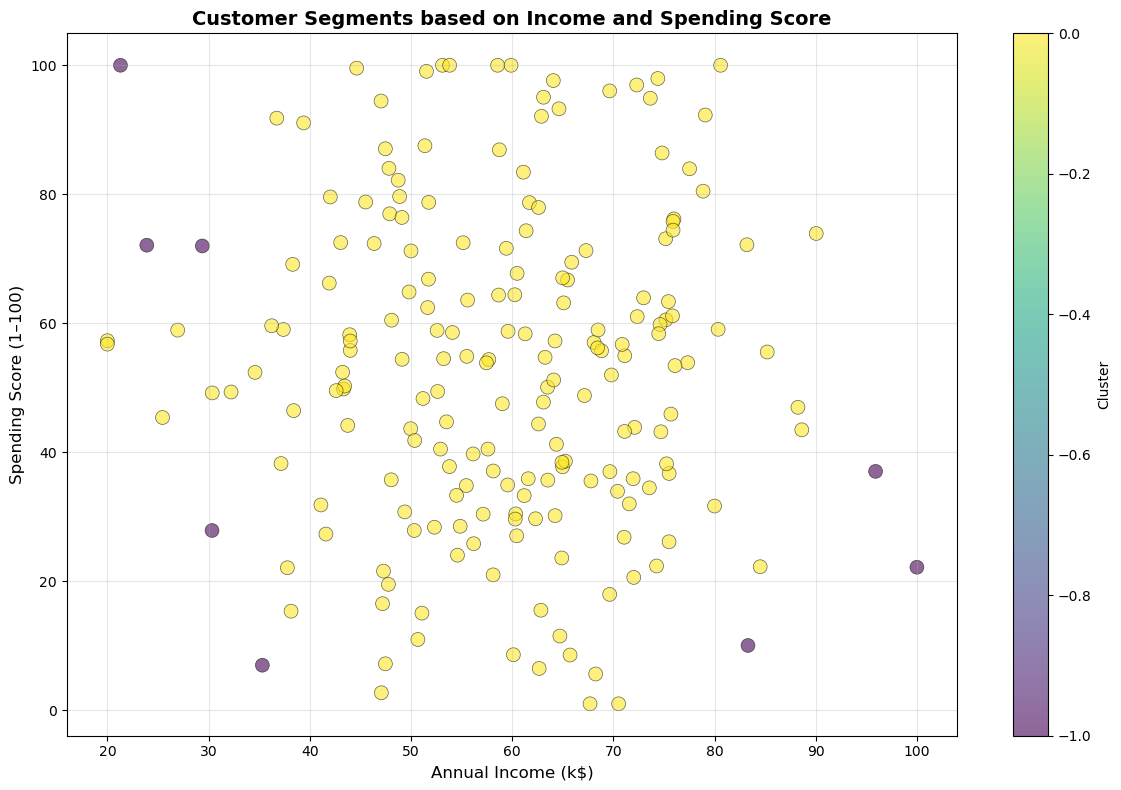

Segment Statistics:
           Age  Annual_Income  Spending_Score  Gender_Male  CustomerID
Cluster                                                               
-1       43.50          52.43           43.52         0.38           8
 0       43.86          59.17           53.16         0.57         192


In [205]:

# 1. Create segment visualization
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    df['Annual_Income'],
    df['Spending_Score'],
    c=df['Cluster'],  # color by cluster
    cmap='viridis',
    s=100,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

plt.colorbar(scatter, label='Cluster')
plt.title('Customer Segments based on Income and Spending Score', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1–100)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Analyze segment characteristics
print("Segment Statistics:")

segment_stats = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual_Income': 'mean',
    'Spending_Score': 'mean',
    'Gender_Male': 'mean',            # proportion of males (0-1)
    'CustomerID': 'count'             # number of customers in cluster
}).round(2)

print(segment_stats)

## Conclusion and Interpretation
Summarize your findings and interpret the results. Consider the following questions:

1. What distinct customer segments did DBSCAN identify?
2. How many meaningful segments were found?
3. What percentage of customers were classified as outliers?
4. What are the characteristics of each segment?
5. How can these insights be used for marketing strategies?